In [1]:
import numpy as np
from cellpose import models, utils
import os
print(os.getpid())

dapi_im = np.load(r'Y:\20211129-P_brain_CTP12-RNA\Analysis\images\Conv_zscan_035_dapi.npy')

import cv2
_im = np.array([cv2.resize(_lr, (int(2048/250*108),int(2048/250*108)), 
                           interpolation=cv2.INTER_AREA) for _lr in dapi_im])

#_im = dapi_im[:,:800,:800]
model = models.Cellpose(gpu=True, model_type='nuclei')


26316
** TORCH CUDA version installed and working. **
>>>> using GPU


In [2]:
#blank_im = np.zeros(np.shape(dapi_im), dtype=np.uint16)

masks, flows, styles, diams = model.eval(_im[:,:,:,np.newaxis],
    #np.stack([blank_im,blank_im,_im], axis=3), 
                                         channels=[0,0],
                                         anisotropy=1,
                                         diameter=70,
                                         min_size=500,
                                         stitch_threshold=0.1,
                                         resample=False,
                                         do_3D=True,
                                         )

processing 1 image(s)
multi-stack tiff read in as having 50 planes 1 channels


  0%|                                                                                            | 0/7 [00:00<?, ?it/s]


 running YX: 50 planes of size (884, 884) 




  0%|                                                                                            | 0/7 [00:02<?, ?it/s]


RuntimeError: CUDA out of memory. Tried to allocate 392.00 MiB (GPU 0; 8.00 GiB total capacity; 5.87 GiB already allocated; 64.00 KiB free; 6.12 GiB reserved in total by PyTorch)

<IPython.core.display.Javascript object>


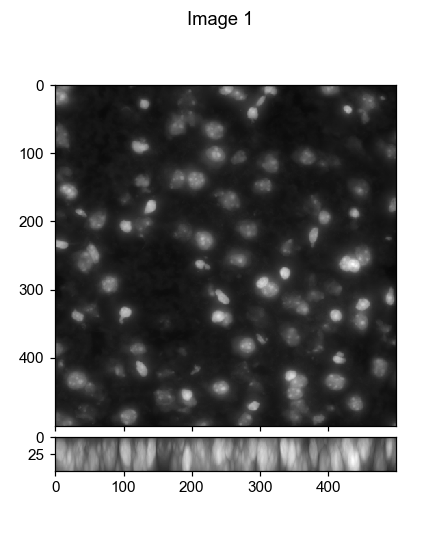

In [3]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *

visual_tools.imshow_mark_3d_v2([_im])

<IPython.core.display.Javascript object>


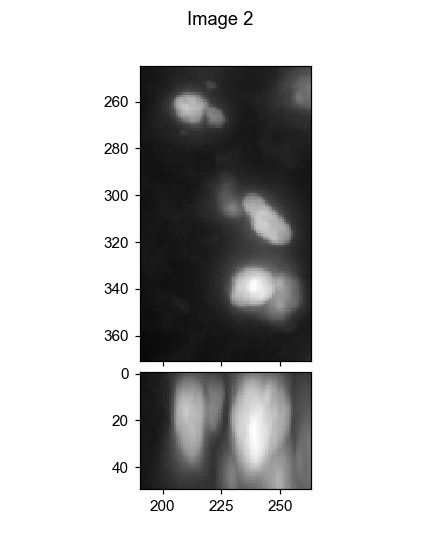

In [4]:
visual_tools.imshow_mark_3d_v2([masks, _im])